In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV







In [5]:
df = pd.read_csv("../Data/processed/dataset_clean.csv")
df.head()

,Temperature,Humidity,pH,Rainfall,Label,Category
0,20.879744,82.002744,6.502985,202.935536,Rice,Cereal
1,21.770462,80.319644,7.038096,226.655537,Rice,Cereal
2,23.004459,82.320763,7.840207,263.964248,Rice,Cereal
3,26.491096,80.158363,6.980401,242.864034,Rice,Cereal
4,20.130175,81.604873,7.628473,262.717340,Rice,Cereal


Definimos para X variables predictoras y (etiqueta a predecir).

X contiene las características o condiciones ambientales que explican el cultivo como temperature, Humidity, pH y Rainfall.

Y contiene la columna Label, que es el tipo de cultivo que queremos predecir.

Vamos a realizar la aplicacion de modelos principalmente para cada tipo de cultivo, y por curiosidad tambien lo aplicaremos a cada categoria de cultivo.


Iniciaremos con la variable sujeto (Label).

Random Forest, para cada cultivo.

In [6]:
X = df[["Temperature", "Humidity", "pH", "Rainfall"]] 
y = df["Label"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Búsqueda del mejor n_estimators

In [8]:
param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 10, 20, 30]
}

In [9]:
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)


In [10]:
grid.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,500


In [11]:
print("Mejores parámetros encontrados:")
print(grid.best_params_)

Mejores parámetros encontrados:
{'max_depth': 20, 'n_estimators': 500}


Entrenamos el modelo 

In [12]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:

y_pred = best_model.predict(X_test)

In [14]:
train_pred = best_model.predict(X_train)
acc_train = accuracy_score(y_train, train_pred)

In [15]:
acc_test = accuracy_score(y_test, y_pred)

In [16]:
print("\nAccuracy TRAIN Random Forest (Cultivo):", acc_train)
print("Accuracy TEST  Random Forest (Cultivo):", acc_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))

# Reporte final
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy TRAIN Random Forest (Cultivo): 1.0
Accuracy TEST  Random Forest (Cultivo): 0.965

Accuracy: 0.965

Classification Report:

                  precision    recall  f1-score   support

        Aleovera       1.00      1.00      1.00        12
           Apple       0.90      0.95      0.93        20
        Arecanut       1.00      0.93      0.97        15
     Ashwagandha       1.00      1.00      1.00        25
           Bajra       1.00      1.00      1.00        21
          Banana       1.00      1.00      1.00        22
        Beetroot       1.00      1.00      1.00        29
       Blackgram       0.88      1.00      0.94        15
         Brinjal       0.95      1.00      0.97        19
        Broccoli       1.00      1.00      1.00        18
Button Mushrooms       0.67      0.67      0.67        21
         Cabbage       0.94      1.00      0.97        15
        Capsicum       0.86      0.95      0.90        19
          Carrot       1.00      1.00      1.00       

Resultados

In [18]:
labels = sorted(y_test.unique())

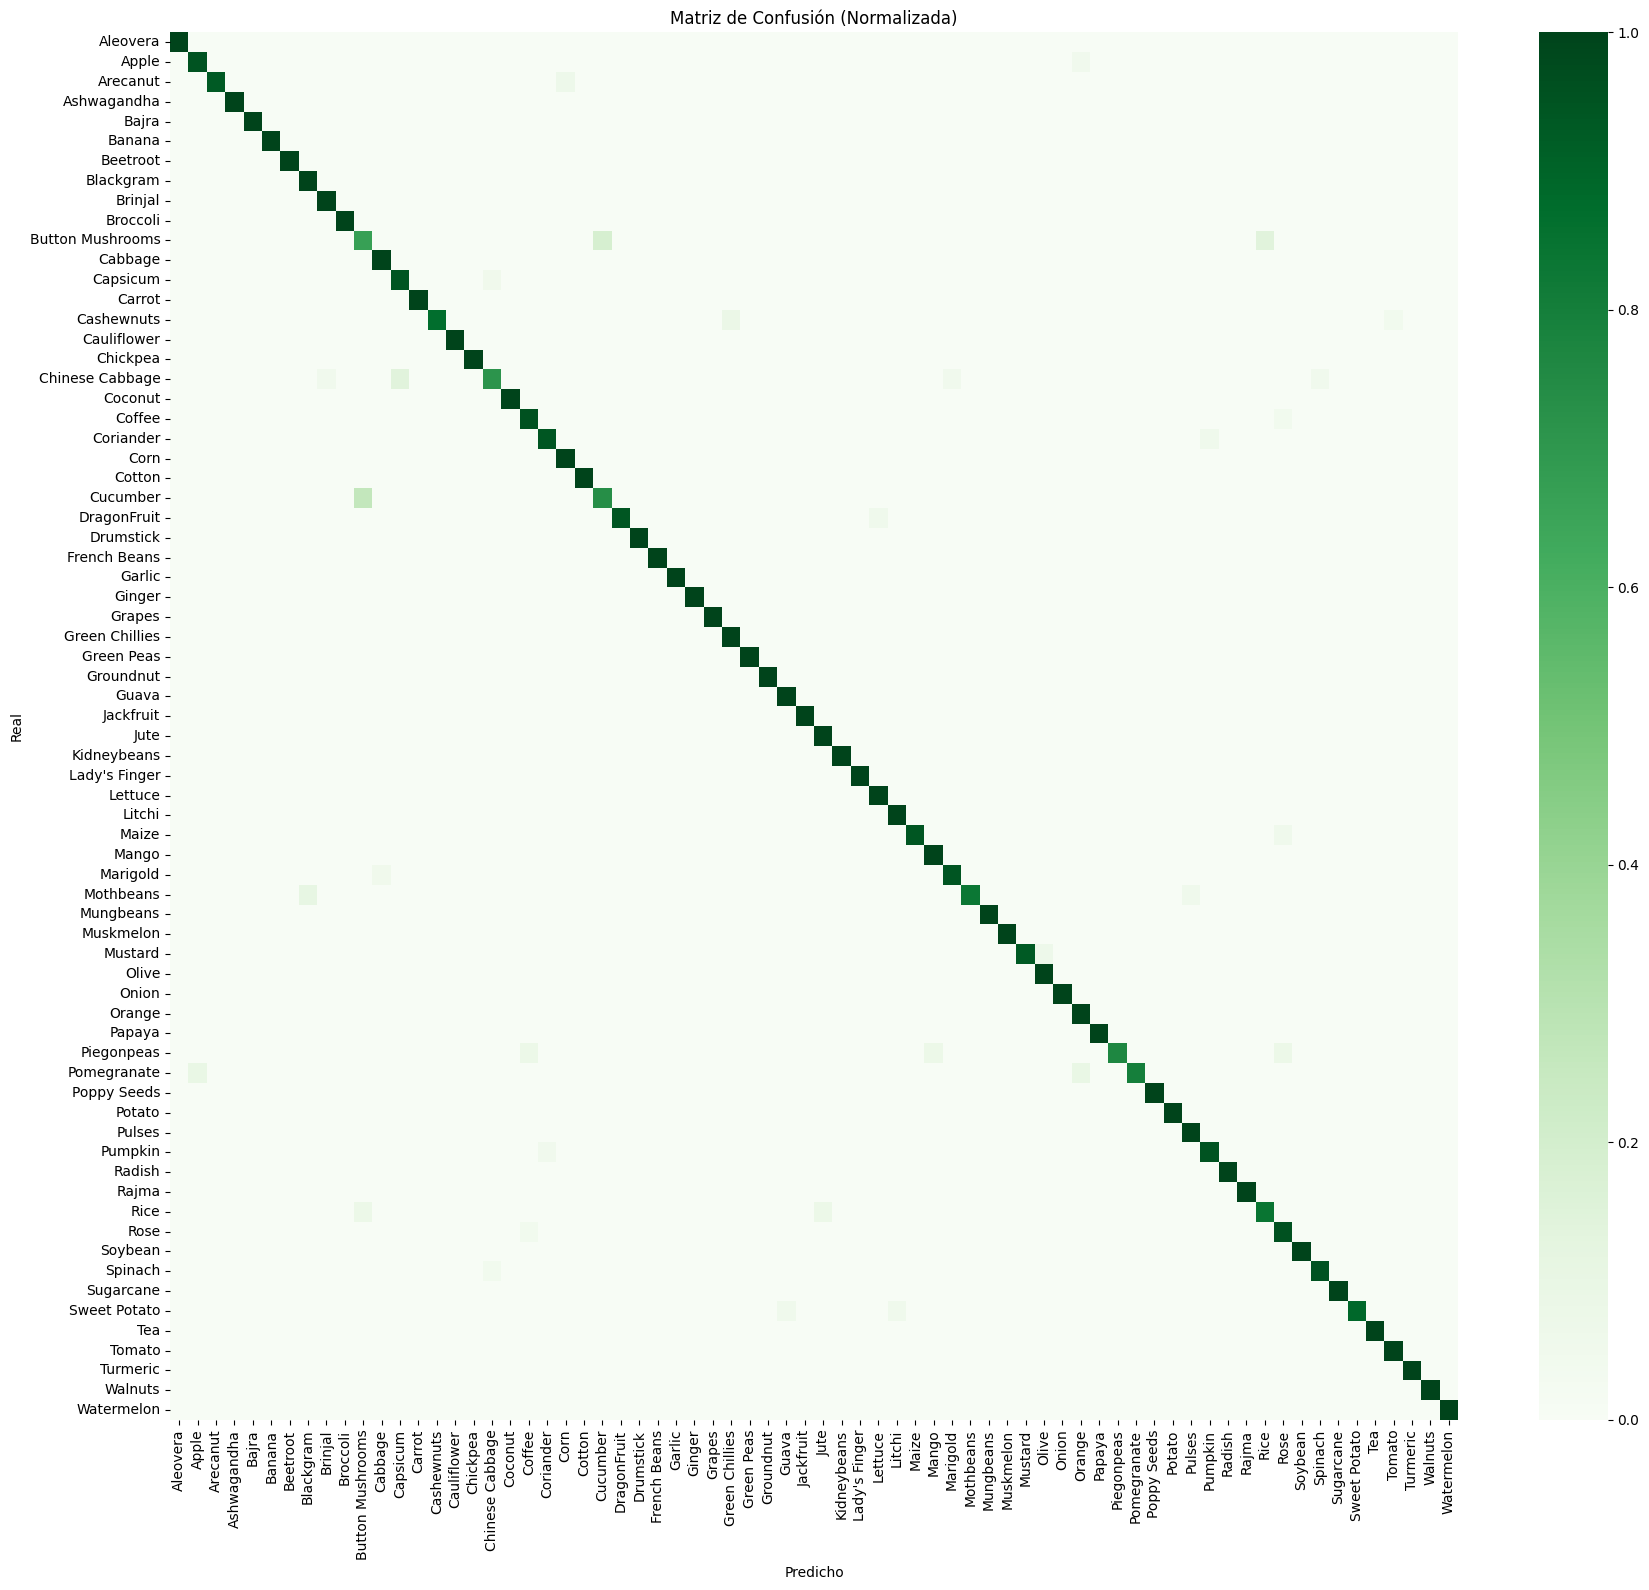

In [19]:
cm_norm = confusion_matrix(y_test, y_pred, normalize="true")

plt.figure(figsize=(18, 16))
sns.heatmap(cm_norm, cmap="Greens", xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión (Normalizada)")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


La matriz de confusión normalizada muestra que el modelo Random Forest clasifica los cultivos individuales con gran precisión, ya que la diagonal contiene valores casi perfectos y los errores son mínimos.

In [20]:
X = df[["Temperature", "Humidity", "pH", "Rainfall"]] 
y = df["Category"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [22]:
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
y_pred = model.predict(X_test)

In [24]:
categorias = sorted(y.unique())

ACCURACY DE TRAIN Y TEST

In [25]:
train_acc = model.score(X_train, y_train)
test_acc  = model.score(X_test, y_test)

In [26]:
print("Accuracy TRAIN (Categoria):", train_acc)
print("Accuracy TEST (Categoria) :", test_acc)
print("Accuracy del modelo:")
print(accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy TRAIN (Categoria): 1.0
Accuracy TEST (Categoria) : 0.9771428571428571
Accuracy del modelo:
0.9771428571428571

Classification Report:
                 precision    recall  f1-score   support

         Cereal       0.96      0.96      0.96        80
Commercial Crop       0.98      0.97      0.98       220
         Flower       0.94      0.82      0.88        40
          Fruit       0.97      1.00      0.98       260
         Legume       0.99      0.98      0.99       180
      Medicinal       1.00      1.00      1.00        40
          Other       0.96      0.94      0.95       120
          Spice       1.00      0.97      0.99        40
      Vegetable       0.98      0.99      0.98       420

       accuracy                           0.98      1400
      macro avg       0.98      0.96      0.97      1400
   weighted avg       0.98      0.98      0.98      1400



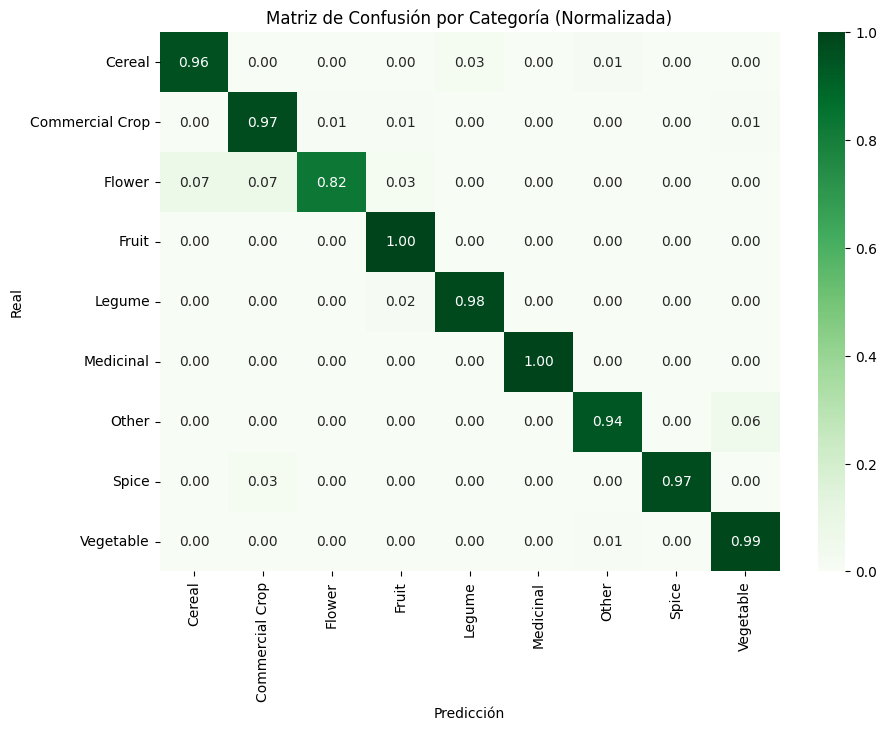

In [27]:
cm = confusion_matrix(y_test, y_pred, labels=categorias, normalize="true")

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="Greens", fmt=".2f",
            xticklabels=categorias, yticklabels=categorias)
plt.title("Matriz de Confusión por Categoría (Normalizada)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

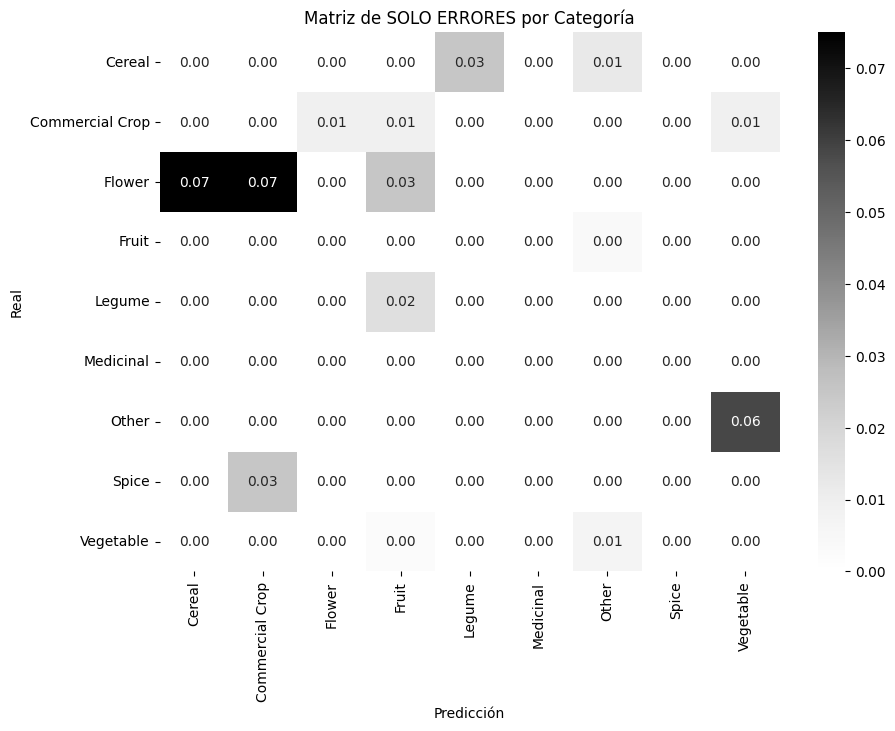

In [28]:
cm_errors = cm.copy()
np.fill_diagonal(cm_errors, 0)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_errors, annot=True, cmap="Greys", fmt=".2f",
            xticklabels=categorias, yticklabels=categorias)
plt.title("Matriz de SOLO ERRORES por Categoría")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

El modelo presenta un desempeño excelente con una exactitud del 98%. La mayoría de las categorías se clasifican casi perfectamente, especialmente Medicinal, Fruit, Legume, Spice y Vegetable. La única clase con mayor dificultad es Flower, que muestra más confusiones con Cereal y Commercial Crop. Aun así, los errores son mínimos y el modelo demuestra ser muy preciso, estable y confiable.

MODELO KNN

Lo aplicaremos primero para cada cultivo que es el objetivo principal

In [29]:
X = df[['Temperature', 'Humidity', 'pH', 'Rainfall']]
y = df['Label']

Escalado

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [33]:

y_pred = knn.predict(X_test)


In [34]:
# Accuracy de TRAIN
y_train_pred = knn.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)

# Accuracy de TEST
acc_test = accuracy_score(y_test, y_pred)

print("Accuracy TRAIN KNN (Cultivos):", acc_train)
print("Accuracy TEST  KNN (Cultivos):", acc_test)


Accuracy TRAIN KNN (Cultivos): 0.9032142857142857
Accuracy TEST  KNN (Cultivos): 0.8328571428571429


El modelo acierta el 90.32% de las veces en los datos con los que aprendió (TRAIN).

Cuando se prueba con datos NUEVOS, el modelo acierta el 83.29% de las veces.

In [35]:
print("Accuracy KNN (Cultivos):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

Accuracy KNN (Cultivos): 0.8328571428571429
                  precision    recall  f1-score   support

        Aleovera       0.86      1.00      0.92        12
           Apple       0.72      0.90      0.80        20
        Arecanut       1.00      0.87      0.93        15
     Ashwagandha       1.00      1.00      1.00        25
           Bajra       0.91      1.00      0.95        21
          Banana       0.65      0.91      0.75        22
        Beetroot       0.90      0.97      0.93        29
       Blackgram       0.46      0.80      0.59        15
         Brinjal       0.76      0.68      0.72        19
        Broccoli       0.78      1.00      0.88        18
Button Mushrooms       0.56      0.67      0.61        21
         Cabbage       0.88      0.93      0.90        15
        Capsicum       0.70      1.00      0.83        19
          Carrot       1.00      1.00      1.00        20
      Cashewnuts       0.89      0.74      0.81        23
     Cauliflower       0.79

In [36]:
cv_scores = cross_val_score(knn, X_scaled, y, cv=5, scoring="accuracy")

print("Cross Validation Scores:", cv_scores)
print("Cross Validation Mean:", cv_scores.mean())
print("Cross Validation Std:", cv_scores.std())

Cross Validation Scores: [0.84214286 0.85571429 0.83928571 0.85928571 0.85071429]
Cross Validation Mean: 0.8494285714285714
Cross Validation Std: 0.007671840904055748


El modelo KNN para cultivos muestra un desempeño estable y consistente, con un accuracy promedio del 84.94% y una variabilidad muy baja (STD = 0.0077).
Esto indica que el modelo generaliza bien y no depende de una división específica de los datos, por lo que es confiable para predicciones reales.

In [ ]:
labels = sorted(df["Label"].unique())

 Matriz de Confusión Normalizada por Clase

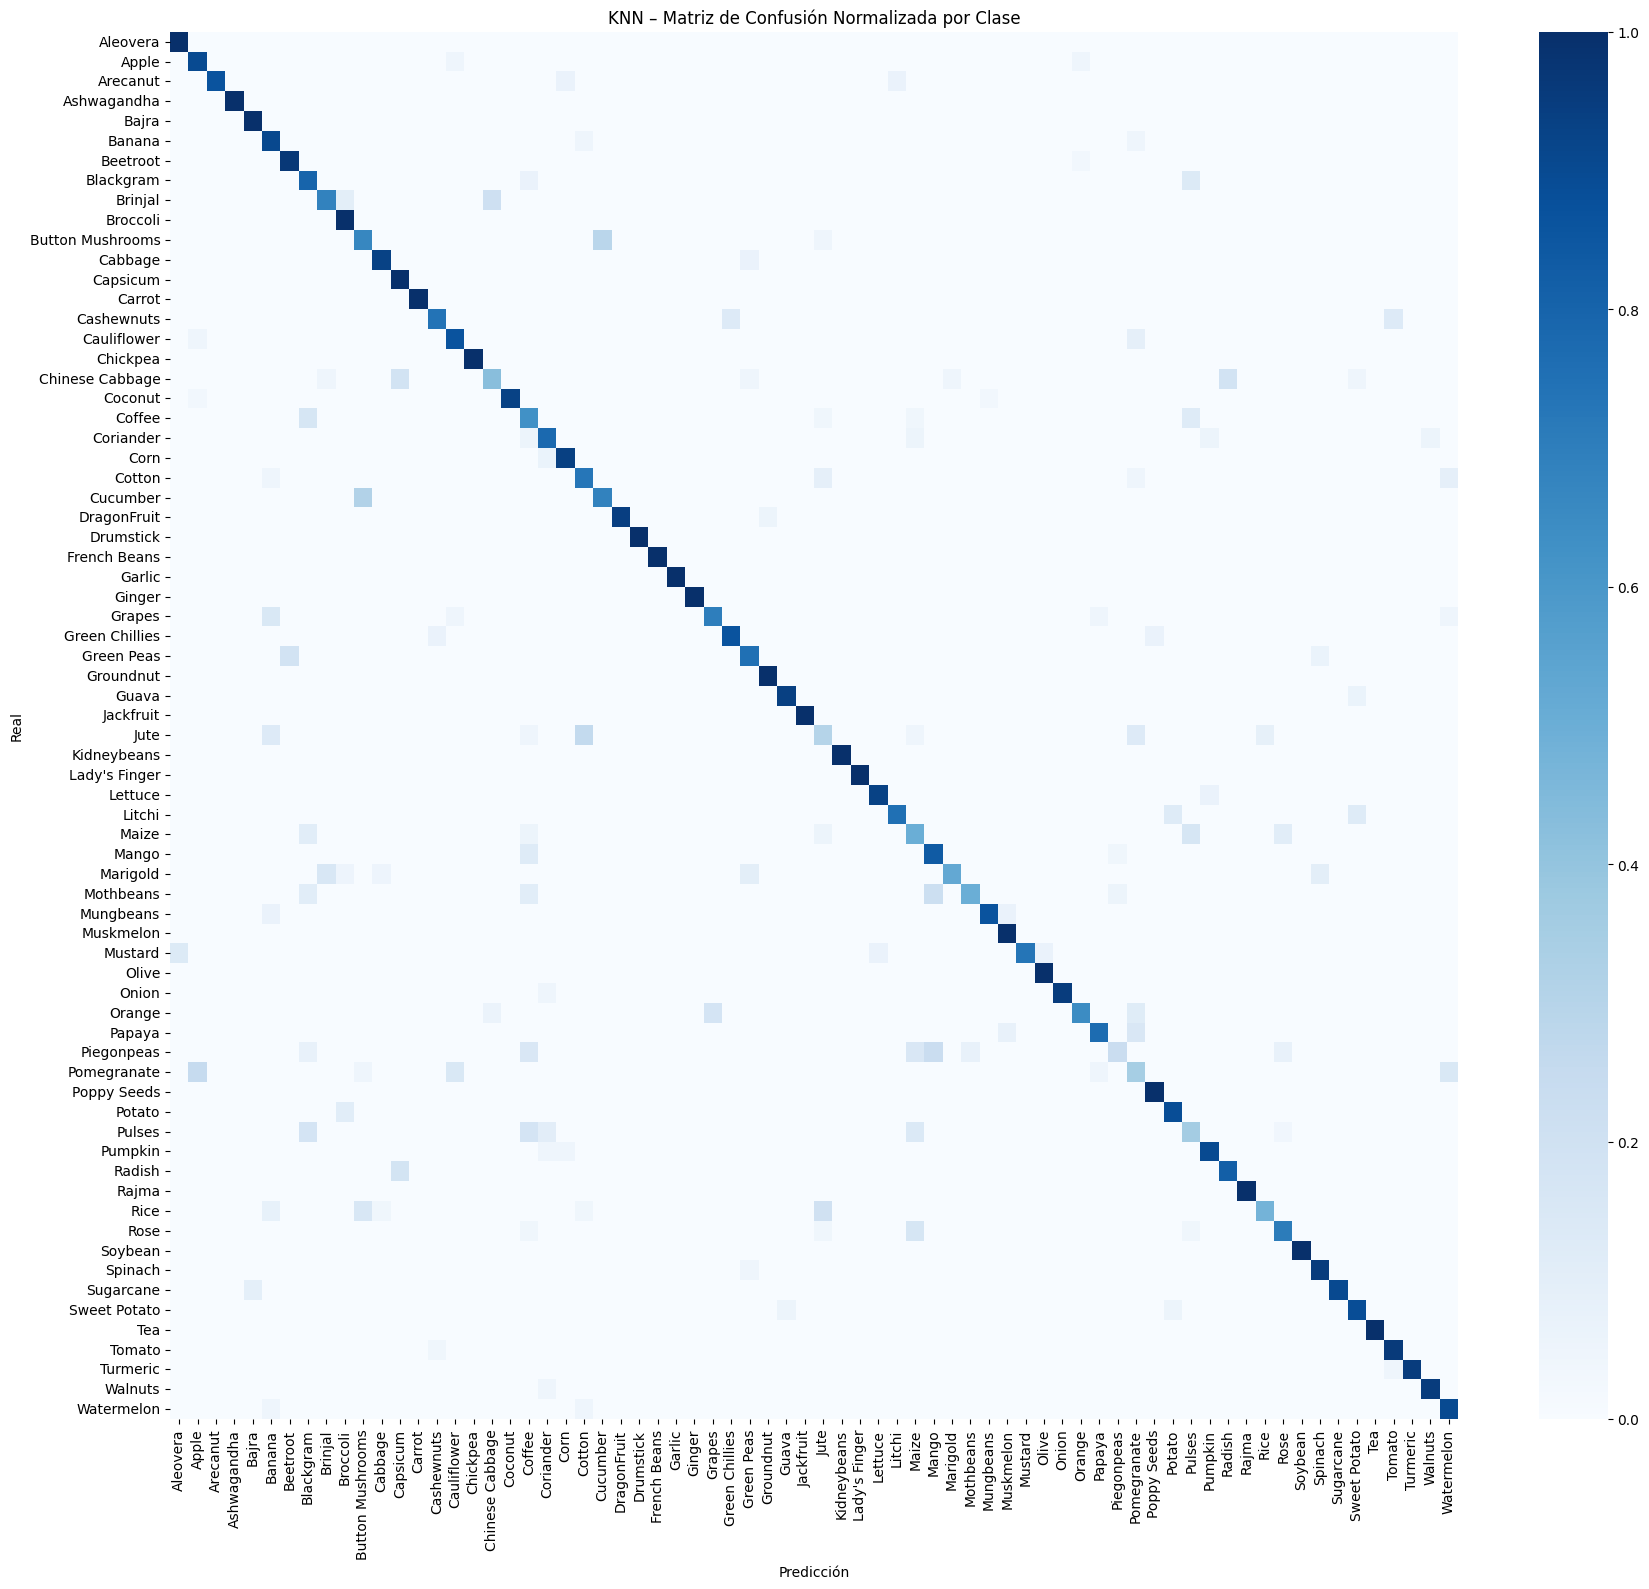

In [37]:
cm_norm = confusion_matrix(y_test, y_pred, labels=labels, normalize="true")

plt.figure(figsize=(18, 16))
sns.heatmap(
    cm_norm,
    annot=False,
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels
)
plt.title("KNN – Matriz de Confusión Normalizada por Clase")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


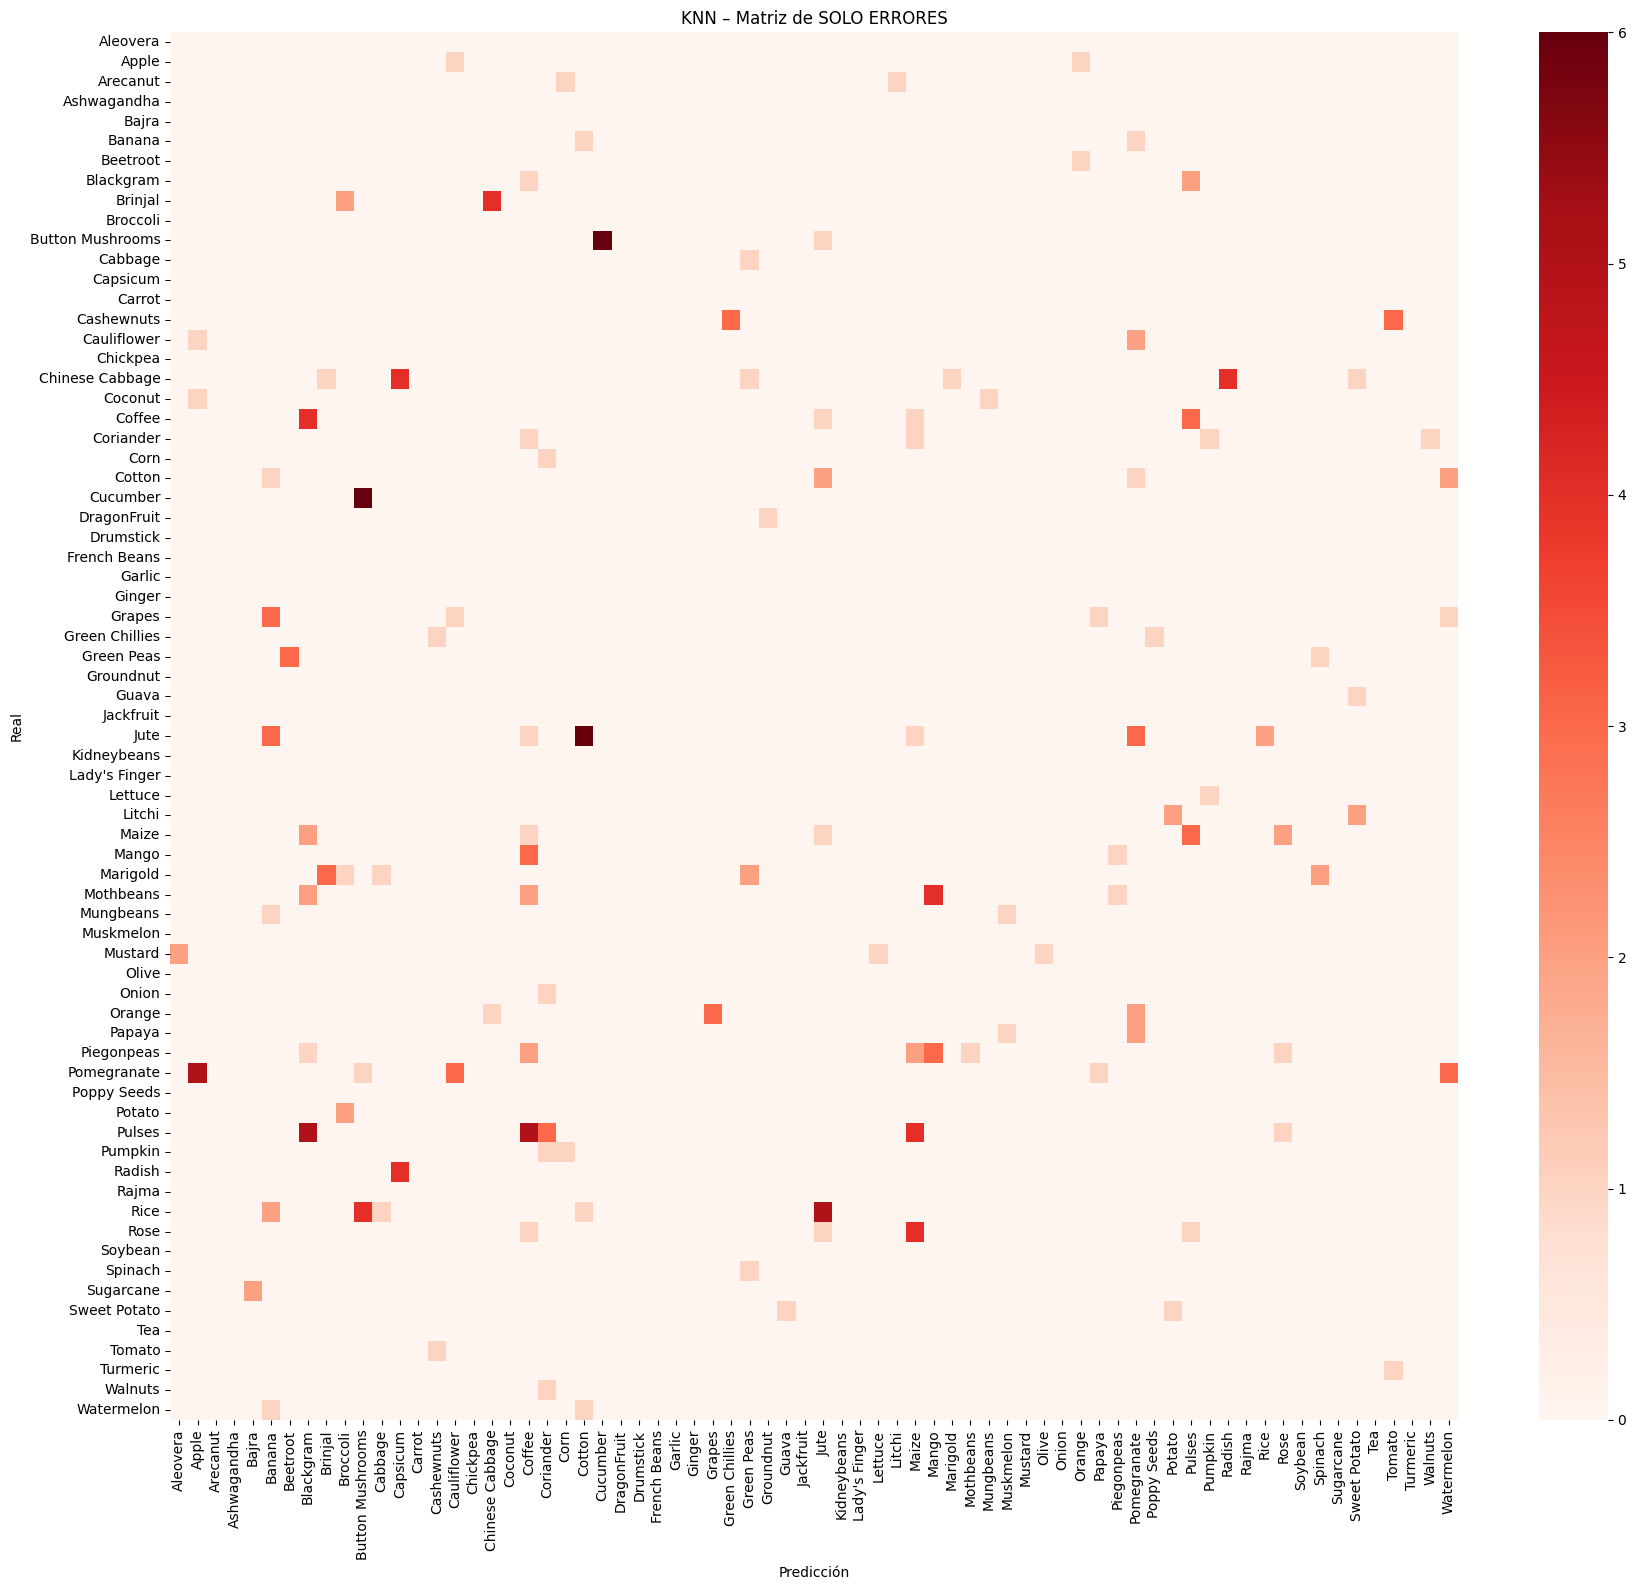

In [38]:
cm = confusion_matrix(y_test, y_pred, labels=labels)
cm_errors = cm.copy()
np.fill_diagonal(cm_errors, 0)  

plt.figure(figsize=(18, 16))
sns.heatmap(
    cm_errors,
    annot=False,
    cmap="Reds",
    xticklabels=labels,
    yticklabels=labels
)
plt.title("KNN – Matriz de SOLO ERRORES")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

El modelo KNN alcanzó un accuracy del 83%, mostrando un rendimiento aceptable en la clasificación de cultivos. Funciona bien en cultivos con características ambientales muy claras, pero presenta más errores cuando varias especies comparten condiciones similares de temperatura, humedad o pH. Las matrices de confusión muestran que, aunque la mayoría de las clases se clasifican correctamente, existen confusiones dispersas entre cultivos parecidos.

En general, KNN ofrece un desempeño estable, pero no es el modelo más preciso para este tipo de datos comparado con alternativas como Random Forest.

Ahora se aplicara KNN para cada categoria de cultivo.

In [39]:
X = df[['Temperature', 'Humidity', 'pH', 'Rainfall']]
y = df['Category']   

Escalado

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [42]:
knn_cat = KNeighborsClassifier(n_neighbors=5)
knn_cat.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [43]:
y_pred = knn_cat.predict(X_test)

In [44]:
acc_train = accuracy_score(y_train, knn_cat.predict(X_train))
acc_test = accuracy_score(y_test, y_pred)

In [45]:
print("Accuracy TRAIN KNN (Categoría):", acc_train)
print("Accuracy TEST  KNN (Categoría):", acc_test)

Accuracy TRAIN KNN (Categoría): 0.9339285714285714
Accuracy TEST  KNN (Categoría): 0.8885714285714286


In [46]:
print("\nClassification Report KNN (Categoría):\n")
print("Accuracy KNN (categoria):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Classification Report KNN (Categoría):

Accuracy KNN (categoria): 0.8885714285714286
                 precision    recall  f1-score   support

         Cereal       0.74      0.75      0.75        80
Commercial Crop       0.88      0.88      0.88       232
         Flower       0.80      0.65      0.72        43
          Fruit       0.89      0.93      0.91       249
         Legume       0.93      0.86      0.89       183
      Medicinal       0.95      1.00      0.97        37
          Other       0.77      0.76      0.77       114
          Spice       0.92      0.87      0.89        38
      Vegetable       0.93      0.96      0.94       424

       accuracy                           0.89      1400
      macro avg       0.87      0.85      0.86      1400
   weighted avg       0.89      0.89      0.89      1400



In [47]:
cv_scores = cross_val_score(knn_cat, X_scaled, y, cv=5, scoring="accuracy")

print("Cross Validation Scores:", cv_scores)
print("Cross Validation Mean:", cv_scores.mean())
print("Cross Validation Std:", cv_scores.std())

Cross Validation Scores: [0.45571429 0.55214286 0.57285714 0.60071429 0.57071429]
Cross Validation Mean: 0.5504285714285715
Cross Validation Std: 0.04983360066362896


El modelo KNN para clasificar categorías de cultivos obtuvo un buen desempeño general, con un accuracy del 88.8% y altas precisiones en categorías grandes como Vegetable, Fruit y Commercial Crop. Sin embargo, presenta errores en categorías pequeñas o similares entre sí, lo que también se refleja en un bajo rendimiento en validación cruzada (≈55%), indicando que el modelo no generaliza tan bien en todas las particiones de los datos. En conjunto, KNN funciona bien, pero no es el modelo más estable para esta tarea.

Matriz de Confusión – Valores Absolutos

In [48]:
labels_cat = sorted(df["Category"].unique())
cm = confusion_matrix(y_test, y_pred, labels=labels_cat)

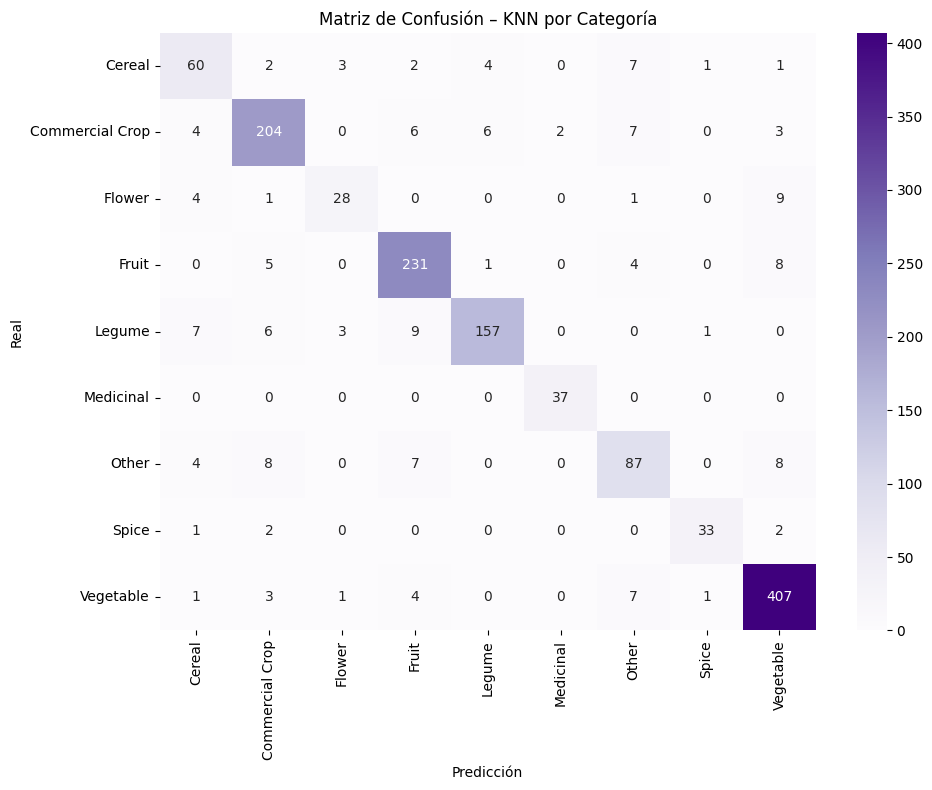

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Purples",
    xticklabels=labels_cat,
    yticklabels=labels_cat
)
plt.title("Matriz de Confusión – KNN por Categoría")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

Matriz de Confusión Normalizada

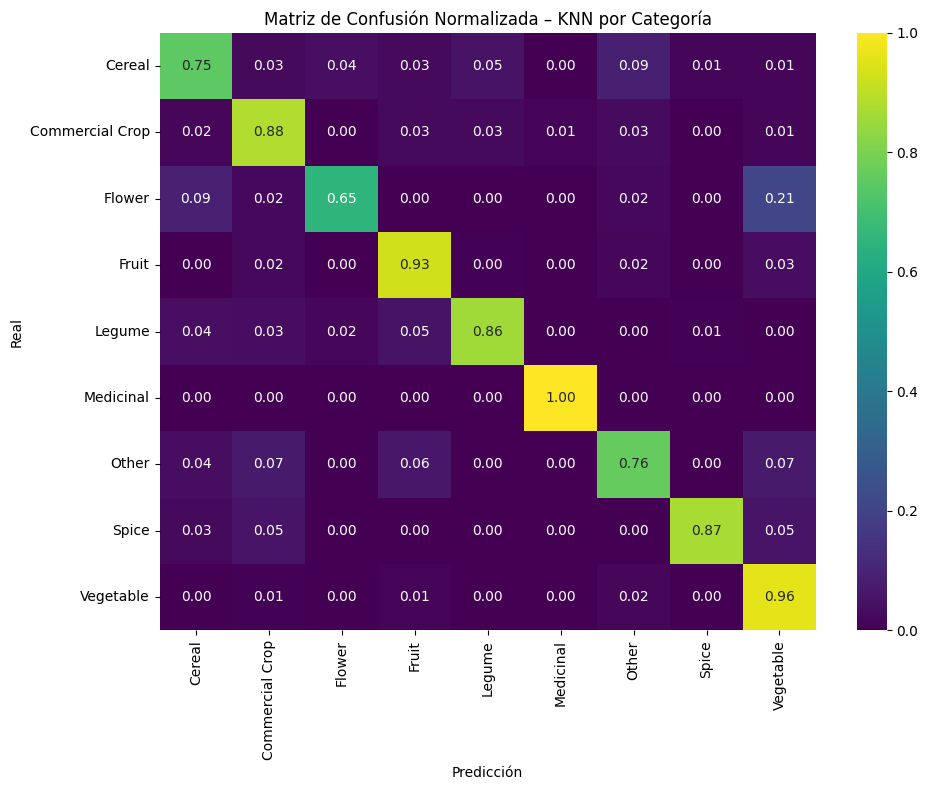

In [50]:
cm_norm = confusion_matrix(y_test, y_pred, labels=labels_cat, normalize="true")

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_norm,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    xticklabels=labels_cat,
    yticklabels=labels_cat
)
plt.title("Matriz de Confusión Normalizada – KNN por Categoría")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

Las matrices de confusión muestran que KNN clasifica muy bien las categorías principales como Vegetable, Fruit, Legume y Commercial Crop, con altos porcentajes en la diagonal. Sin embargo, presenta confusiones en categorías parecidas o con pocas muestras como Cereal, Flower y Other. En general, el modelo tiene buen desempeño, pero no es igualmente preciso para todas las categorías.

SVM - Support Vector Machine (Máquina de Vectores de Soporte)

SVM PARA CULTIVO (Label)

Variables predictoras y etiqueta

In [51]:
X = df[['Temperature', 'Humidity', 'pH', 'Rainfall']]
y = df['Label']

In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

GridSearch para encontrar los mejores parámetros

In [54]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

In [59]:
grid_svm = GridSearchCV(
    SVC(),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_svm.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'linear']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [60]:
print("Mejores parámetros SVM (Cultivo):")
print(grid_svm.best_params_)
print("Best Score CV:", grid_svm.best_score_)

Mejores parámetros SVM (Cultivo):
{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Score CV: 0.8782136400769041


Ahora se debe entrenar el modelo con los mejores parámetros

In [61]:
svm_best = grid_svm.best_estimator_
svm_best.fit(X_train, y_train)

,C,10
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [62]:
y_pred = svm_best.predict(X_test)

Acurracy train - test

In [63]:
acc_train = accuracy_score(y_train, svm_best.predict(X_train))
acc_test = accuracy_score(y_test, y_pred)

In [64]:
print("\nAccuracy TRAIN SVM (Cultivo):", acc_train)
print("Accuracy TEST  SVM (Cultivo):", acc_test)


Accuracy TRAIN SVM (Cultivo): 0.9057142857142857
Accuracy TEST  SVM (Cultivo): 0.8942857142857142


Reporte

In [65]:
print("\nClassification Report SVM (Cultivo):\n")
print("Accuracy SVM (categoria):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Classification Report SVM (Cultivo):

Accuracy SVM (categoria): 0.8942857142857142
                  precision    recall  f1-score   support

        Aleovera       0.92      1.00      0.96        12
           Apple       0.79      0.95      0.86        20
        Arecanut       1.00      0.93      0.97        15
     Ashwagandha       0.96      1.00      0.98        25
           Bajra       1.00      1.00      1.00        21
          Banana       0.71      1.00      0.83        22
        Beetroot       0.97      1.00      0.98        29
       Blackgram       0.62      0.87      0.72        15
         Brinjal       0.89      0.84      0.86        19
        Broccoli       0.78      1.00      0.88        18
Button Mushrooms       0.55      0.52      0.54        21
         Cabbage       0.88      1.00      0.94        15
        Capsicum       0.76      1.00      0.86        19
          Carrot       1.00      1.00      1.00        20
      Cashewnuts       1.00      0.78      0.

Matriz de Confusión Normalizada

In [66]:
labels = sorted(df['Label'].unique())
cm = confusion_matrix(y_test, y_pred, labels=labels, normalize="true")

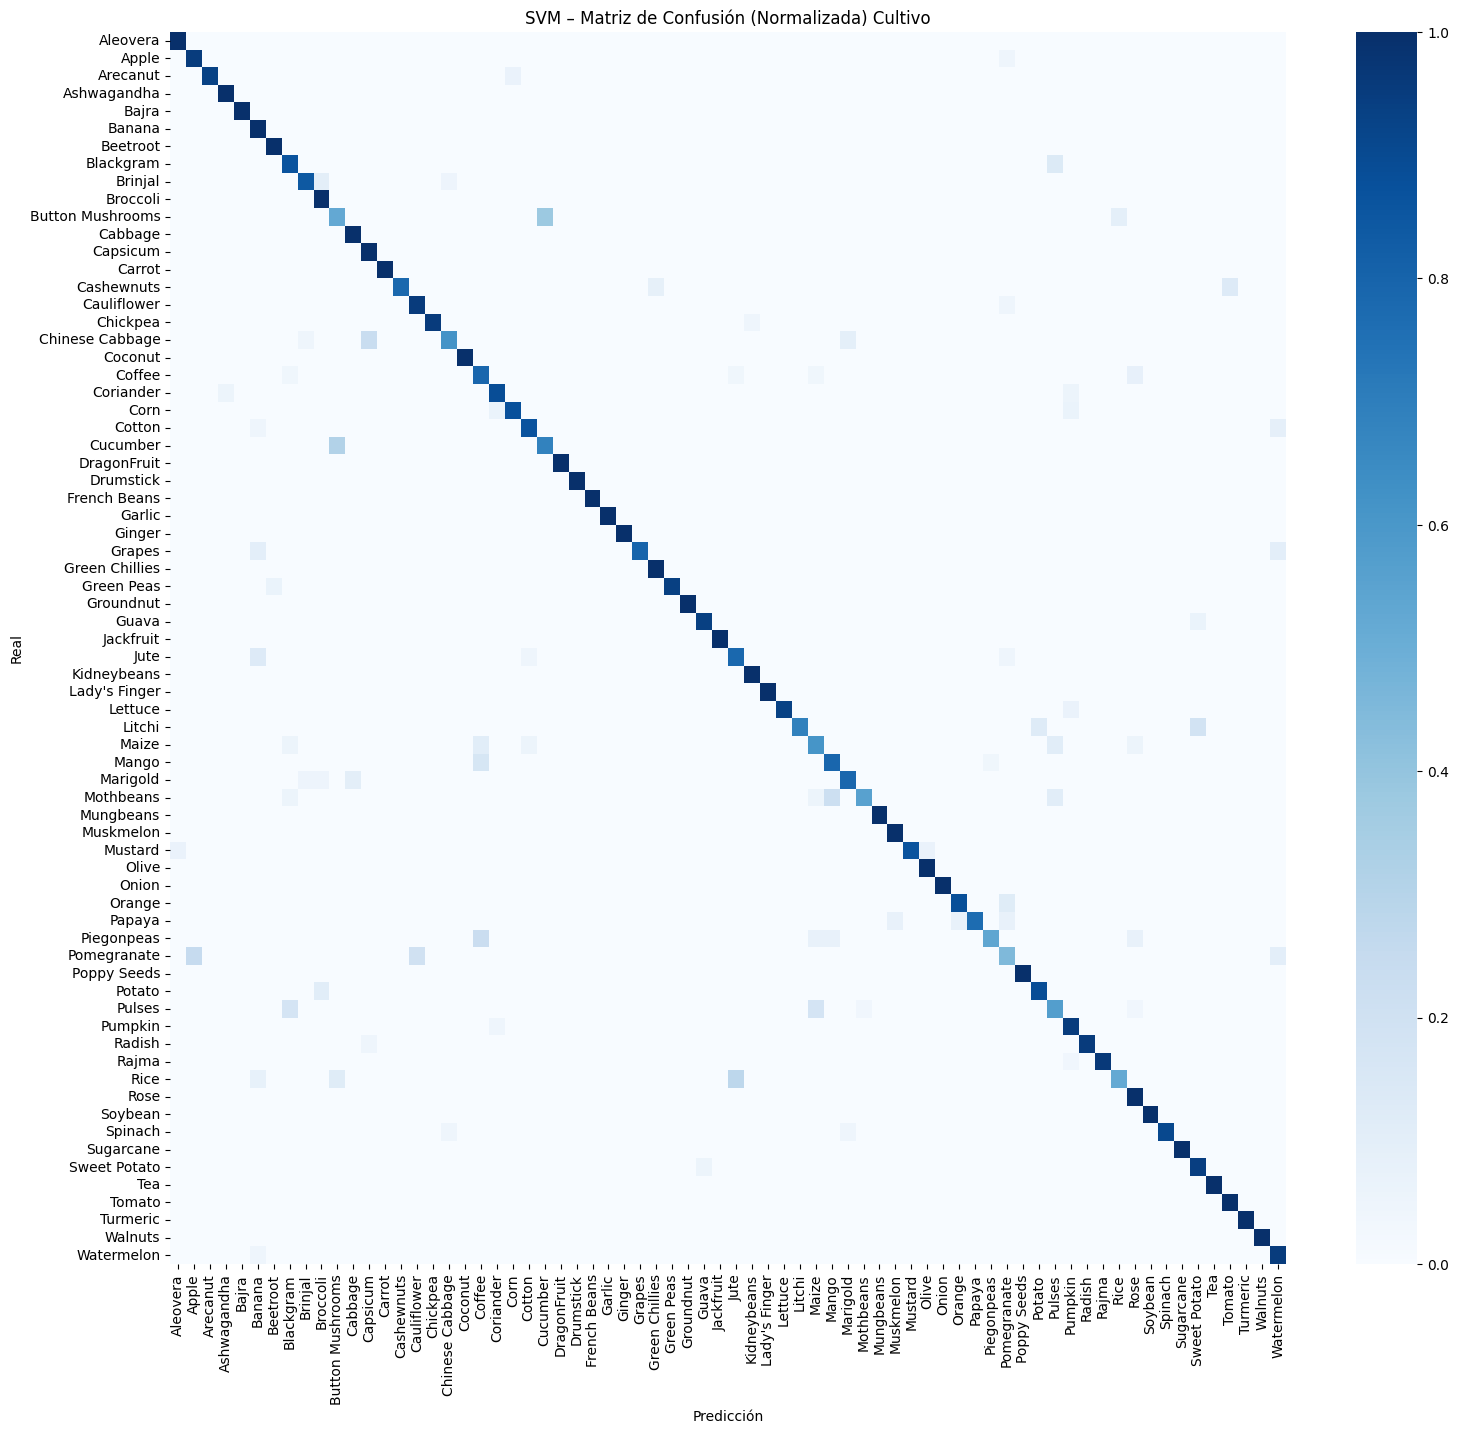

In [67]:
plt.figure(figsize=(18, 16))
sns.heatmap(cm, cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("SVM – Matriz de Confusión (Normalizada) Cultivo")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

SVM PARA CATEGORÍA

In [68]:
X = df[['Temperature', 'Humidity', 'pH', 'Rainfall']]
y = df['Category']

In [69]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [71]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

In [72]:
grid_svm_cat = GridSearchCV(
    SVC(),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)


In [73]:
grid_svm_cat.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'linear']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [74]:
print("Mejores parámetros SVM (Categoría):")
print(grid_svm_cat.best_params_)
print("Best Score CV:", grid_svm_cat.best_score_)

Mejores parámetros SVM (Categoría):
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score CV: 0.8496436767818026


 Mejor modelo

In [75]:
svm_best_cat = grid_svm_cat.best_estimator_
svm_best_cat.fit(X_train, y_train)

,C,10
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [76]:
y_pred = svm_best_cat.predict(X_test)

In [77]:
acc_train = accuracy_score(y_train, svm_best_cat.predict(X_train))
acc_test = accuracy_score(y_test, y_pred)

In [78]:

print("\nAccuracy TRAIN SVM (Categoría):", acc_train)
print("Accuracy TEST  SVM (Categoría):", acc_test)


Accuracy TRAIN SVM (Categoría): 0.87375
Accuracy TEST  SVM (Categoría): 0.87


Reporte

In [79]:
print("\nClassification Report SVM (Categoría):\n")
print("Accuracy SVM (Label):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Classification Report SVM (Categoría):

Accuracy SVM (Label): 0.87
                 precision    recall  f1-score   support

         Cereal       0.72      0.72      0.72        80
Commercial Crop       0.91      0.85      0.88       220
         Flower       0.76      0.70      0.73        40
          Fruit       0.83      0.93      0.88       260
         Legume       0.96      0.83      0.89       180
      Medicinal       0.97      0.95      0.96        40
          Other       0.85      0.68      0.76       120
          Spice       1.00      0.80      0.89        40
      Vegetable       0.87      0.95      0.91       420

       accuracy                           0.87      1400
      macro avg       0.87      0.83      0.85      1400
   weighted avg       0.87      0.87      0.87      1400



Matriz de confusion normalizada

In [80]:
labels_cat = sorted(df['Category'].unique())
cm = confusion_matrix(y_test, y_pred, labels=labels_cat, normalize="true")

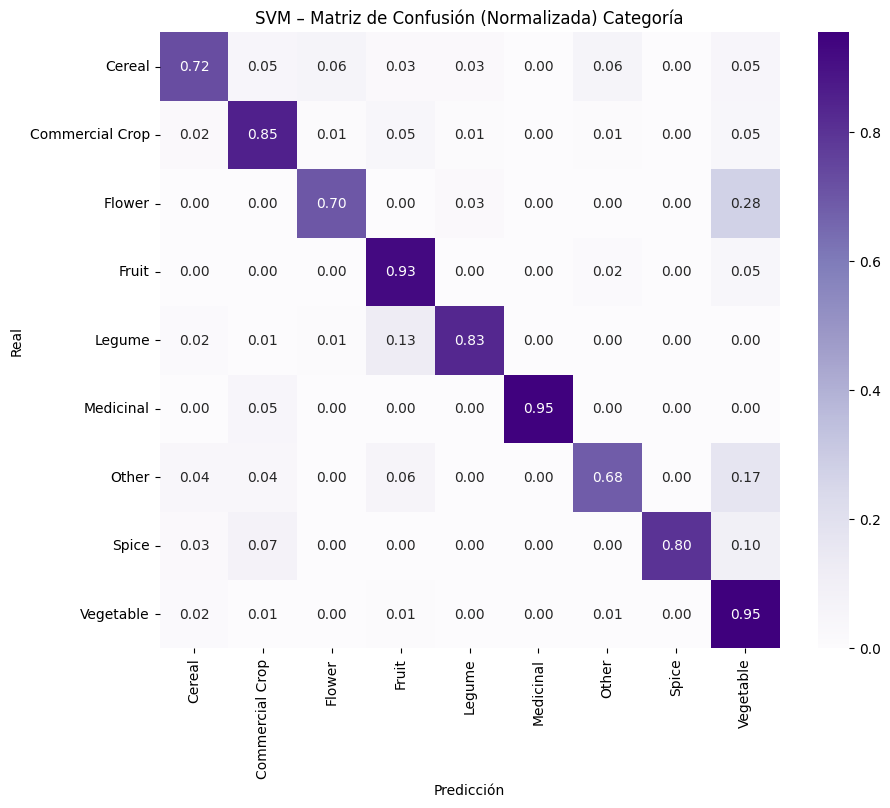

In [81]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, cmap="Purples", annot=True, fmt=".2f",
            xticklabels=labels_cat, yticklabels=labels_cat)
plt.title("SVM – Matriz de Confusión (Normalizada) Categoría")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

El modelo SVM mostró un desempeño sólido tanto para la predicción del cultivo como de la categoría, obteniendo alrededor de 89% de exactitud en cultivos y 87% en categorías.
Las matrices de confusión evidencian que SVM clasifica muy bien la mayoría de las clases, con una diagonal dominante y pocos errores dispersos. Las confusiones aparecen principalmente en cultivos con características ambientales muy parecidas, y en categorías pequeñas como Flower u Other.

_______________________________________________________________________________________________________________________________Ahora vamos a comparar los 3 modelos (Random Forest, SVM y KNN) tanto para cultivo como para categoría, usando gráficas de barras.

ACCURACIES PARA CULTIVO  (Train y Test)

In [82]:
acc_cultivo_train = {
    "Random Forest": 1.0,
    "SVM": 0.9057142857142857,
    "KNN": 0.9032142857142857
}

acc_cultivo_test = {
    "Random Forest": 0.965,
    "SVM": 0.8942857142857142,
    "KNN": 0.8328571428571429
}

ACCURACIES PARA CATEGORÍA  (Train y Test)

In [83]:
acc_categoria_train = {
    "Random Forest": 1.0,
    "SVM": 0.87375,
    "KNN": 0.9339285714285714
}

acc_categoria_test = {
    "Random Forest": 0.9771428571428571,
    "SVM": 0.87,
    "KNN": 0.8885714285714286
}


GRÁFICAS EXTRA: TRAIN VS TEST PARA CULTIVO

In [84]:
modelos = list(acc_cultivo_train.keys())
train_vals = list(acc_cultivo_train.values())
test_vals = list(acc_cultivo_test.values())

In [85]:
x = range(len(modelos))

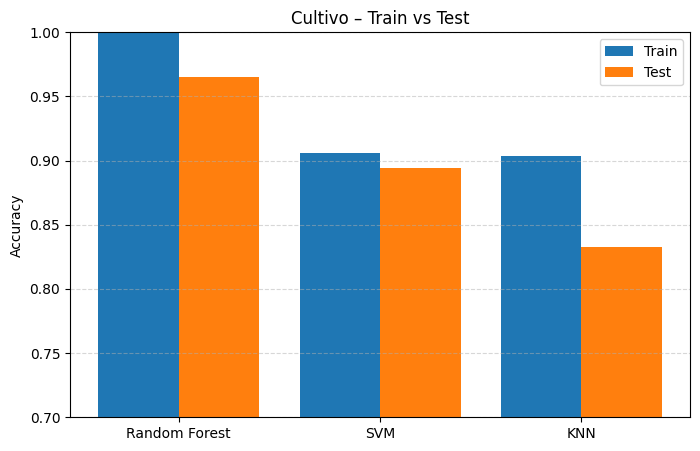

In [86]:
plt.figure(figsize=(8,5))
plt.bar(x, train_vals, width=0.4, label='Train')
plt.bar([i + 0.4 for i in x], test_vals, width=0.4, label='Test')
plt.xticks([i + 0.2 for i in x], modelos)
plt.title("Cultivo – Train vs Test")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

GRÁFICA EXTRA: TRAIN VS TEST PARA CATEGORÍA

In [87]:
modelos = list(acc_categoria_train.keys())
train_vals = list(acc_categoria_train.values())
test_vals = list(acc_categoria_test.values())

In [88]:
x = range(len(modelos))

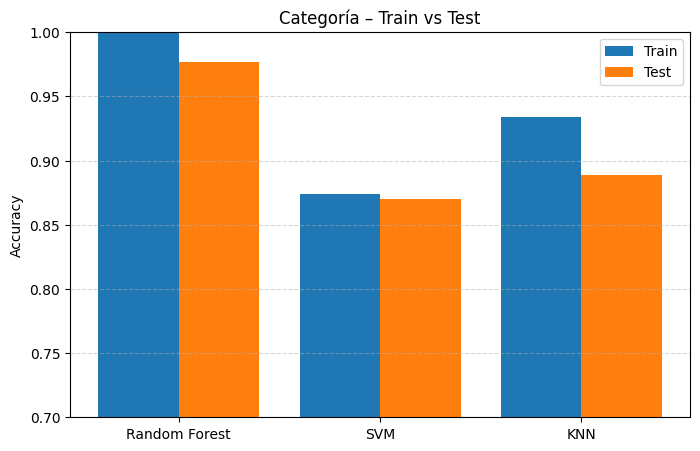

In [89]:
plt.figure(figsize=(8,5))
plt.bar(x, train_vals, width=0.4, label='Train')
plt.bar([i + 0.4 for i in x], test_vals, width=0.4, label='Test')
plt.xticks([i + 0.2 for i in x], modelos)
plt.title("Categoría – Train vs Test")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

*Conclusión de la Comparación de Modelos (Cultivo y Categoría)*

Los resultados muestran un comportamiento consistente entre los modelos Random Forest, SVM y KNN al predecir tanto el cultivo específico como la categoría del cultivo. A partir de las gráficas y métricas obtenidas, pudimos destacar las siguientes conclusiones:

Al analizar las graficas pudimos deducir que Random Forest es el mejor modelo en ambos problemas (Cultivo y Categoría), por las siguientes razones justificadas: 

-Obtiene el mayor accuracy tanto en train como en test.

-Presenta un ligero sobreajuste, ya que llega a 1.0 en entrenamiento, pero mantiene un muy buen desempeño en test (0.965–0.977).

-Esto indica que el modelo generaliza bien a nuevos datos y es el más robusto para este tipo de predicción.

------------------------------------------------------------------------------------------------------------------------------
Observamos que KNN es el modelo más débil en ambos casos, por las siguientes razones:

-Presenta el menor accuracy, especialmente en test (0.83 en cultivo y 0.889 en categoría).

-Esto se debe a que KNN es muy sensible a la escala de los datos, la densidad de puntos y el ruido.

-Aunque no tiene sobreajuste severo, su capacidad de generalización es limitada comparada con los otros modelos.

______________________________________________________________________________________________________________________________
Y finalmente el ultimo modelo SVM tiene un rendimiento medio pero estable, porque: 

-Sus accuracies de train y test son muy similares, lo que significa que generaliza bien y casi no tiene sobreajuste.

-Sin embargo, su rendimiento es inferior al de Random Forest, especialmente en el problema de categoría.

-Es un buen modelo si se busca estabilidad, pero no el que mejores resultados ofrece.

_______________________________________________________________________________________________________________________________

*CONCLUSION GRUPAL:*

Finalmente concluimos conjuntamente que Random Forest es el modelo más preciso y confiable para este proyecto, tanto para predecir el cultivo específico como su categoría, manteniendo un equilibrio muy bueno entre precisión y generalización.

SVM funciona bien como modelo secundario y es estable, mientras que KNN, aunque útil como referencia, no alcanza la precisión de los otros modelos y no es el más adecuado para producción.